In [1]:
# Common imports
import numpy as np
from pprint import pprint

# to make this notebook's output stable across runs
np.random.seed(42)

# sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_validate, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# scipy
from scipy.stats import loguniform

# plotting imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# global settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8,6))

In [3]:
# Ignore all warnings (convergence..) by sklearn
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [4]:
from sklearn.datasets import fetch_openml

X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

In [5]:
X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

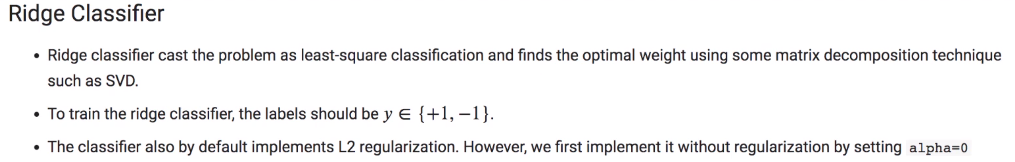

In [6]:
# initilize new variable names with all -1
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))

# find indices with digit 0 image
indx_0 = np.where(y_train == '0')  # remeber original labels are of type str not int
# use those indices to modify y_train_0 and y_test_0
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

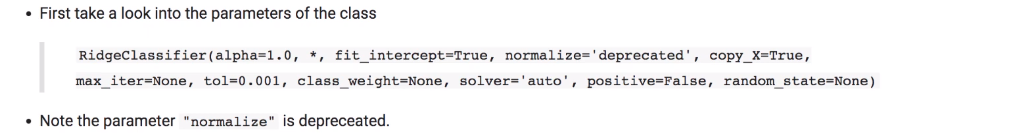

In [7]:
estimator = RidgeClassifier(normalize=False, alpha=0)
pipe_ridge = make_pipeline(MinMaxScaler(), estimator)
pipe_ridge.fit(X_train, y_train_0)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))])

### Performance

In [8]:
y_hat_test_0 = pipe_ridge.predict(X_test)
print(classification_report(y_test_0, y_hat_test_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99      9020
         1.0       0.95      0.88      0.92       980

    accuracy                           0.98     10000
   macro avg       0.97      0.94      0.95     10000
weighted avg       0.98      0.98      0.98     10000



### Cross Validation

In [9]:
cv_bin_ridge_clf = cross_validate(pipe_ridge, X_train, y_train_0, cv=5,
                                 scoring=['precision', 'recall', 'f1'],
                                 return_train_score=True,
                                 return_estimator=True)
pprint(cv_bin_ridge_clf)

{'estimator': [Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))])],
 'fit_time': array([6.49985719, 6.15181112, 5.81876731, 6.13081145, 6.09179664]),
 'score_time': array([0.10301375, 0.10201335, 0.10501409, 0.10201001, 0.10901523]),
 'test_f1': array([0.90763052, 0.89812332, 0.91858407, 0.90535714, 0.90641711]),
 'test_precision'

In [10]:
best_estimator_id = np.argmax(cv_bin_ridge_clf['train_f1'])
best_estimator_id

3

In [11]:
best_estimator = cv_bin_ridge_clf['estimator'][best_estimator_id]

In [12]:
y_hat_test_0 = best_estimator.predict(X_test)
print(classification_report(y_test_0, y_hat_test_0))

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99      9020
         1.0       0.95      0.88      0.91       980

    accuracy                           0.98     10000
   macro avg       0.97      0.94      0.95     10000
weighted avg       0.98      0.98      0.98     10000



In [13]:
# %run Week_6a_MNIST_Digits_Classification_using_SGDRegressor.ipynb
# %run Week_6b_MNIST_Digits_Classification_using_Logistic_Regression.ipynb

importing Jupyter notebook from Week_6a_MNIST_Digits_Classification_using_SGDRegressor.ipynb
Mean of the features: 0.13092720382627604
Standard Deviation: 0.3084510570135976
Minimum value: 0.0
Maximum value: 1.0
Number of samples: 70000, type: float64
Number of features: 784
Number of classes: 10, type: object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


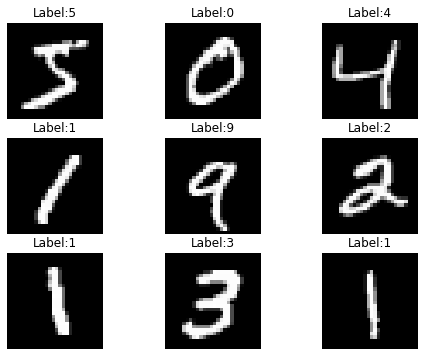

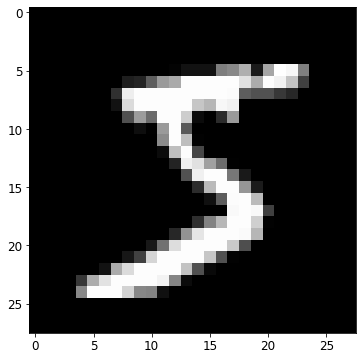

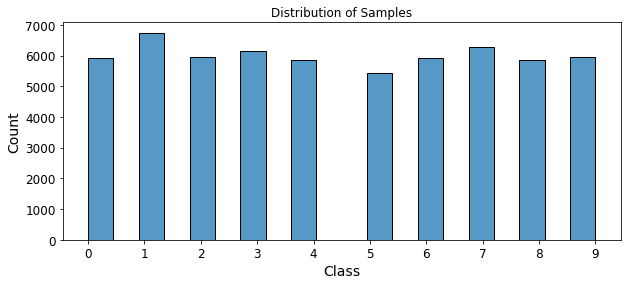

['5' '0' '4' ... '5' '6' '8']
[0. 1. 0. ... 0. 0. 0.]
(array([    1,    21,    34, ..., 59952, 59972, 59987], dtype=int64),)
(array([    1,    21,    34, ..., 59952, 59972, 59987], dtype=int64),)
5923 54077
Training accuracy: 0.90
Testing accuracy: 0.90


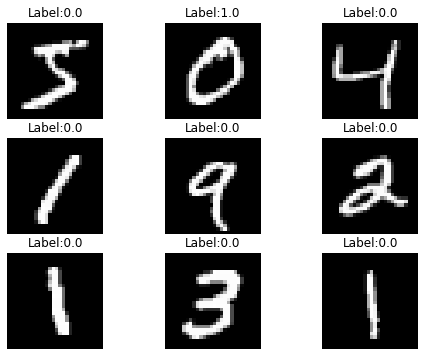

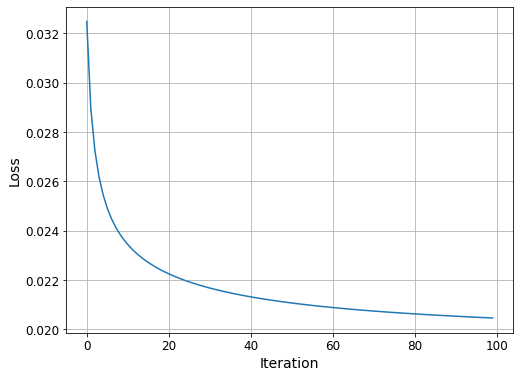

Training Accuracy:  0.99395
Testing Accuracy:  0.9919
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54077
         1.0       0.98      0.96      0.97      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.98      0.98     60000
weighted avg       0.99      0.99      0.99     60000

{'estimator': [SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss

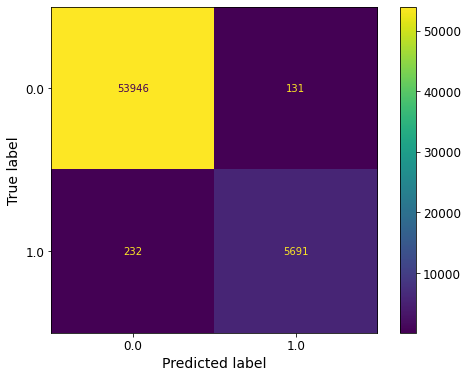

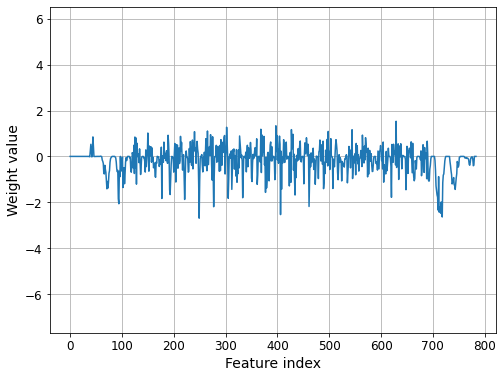

Number of weights with value zero: 67.000000


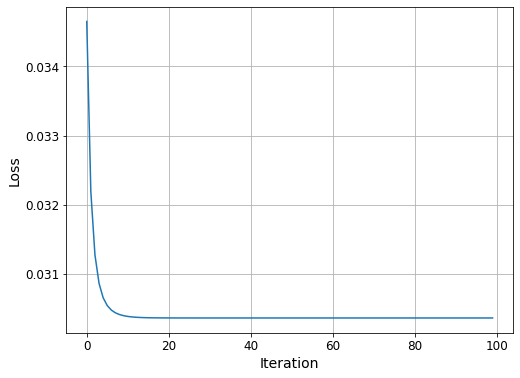

Dimension of Weights w: (1, 784)
Bias: [-4.43002876]


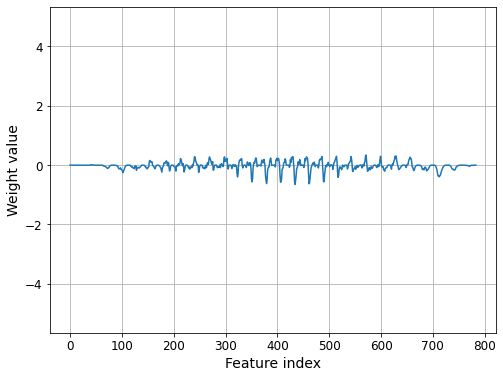

Number of weights with value zero: 67.000000
Training Accuracy:  0.9907166666666667
Testing Accuracy:  0.9905
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     54077
         1.0       0.98      0.93      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



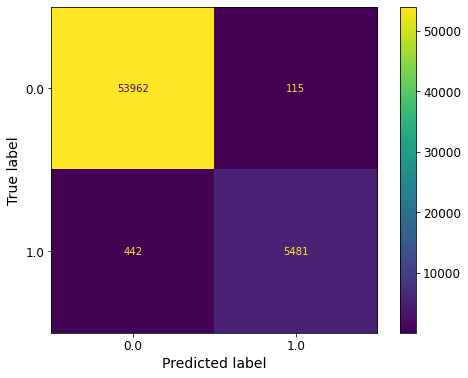

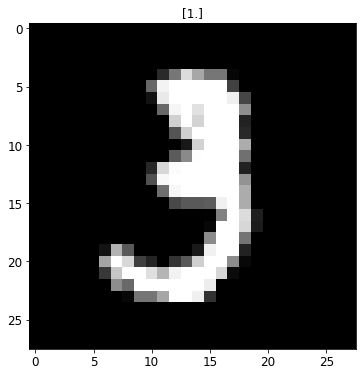

[0.02368864 0.0892718  0.05395031]
{'mean_fit_time': array([0.41165657, 0.42605543, 0.41285763, 0.42265391, 0.41745381]),
 'mean_score_time': array([0.03780847, 0.03780465, 0.04100862, 0.03900595, 0.03800721]),
 'mean_test_f1': array([0.95383975, 0.94148246, 0.94869555, 0.95090017, 0.95474878]),
 'mean_test_precision': array([0.96136672, 0.93597638, 0.94998271, 0.9540212 , 0.96640269]),
 'mean_test_recall': array([0.94682062, 0.94851138, 0.94834146, 0.94850966, 0.94361173]),
 'param_eta0': masked_array(data=[0.02368863950364078, 0.08927180304353625,
                   0.05395030966670228, 0.039687933304443715,
                   0.01432249371823025],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'eta0': 0.02368863950364078},
            {'eta0': 0.08927180304353625},
            {'eta0': 0.05395030966670228},
            {'eta0': 0.039687933304443715},
            {'eta0': 0.01432249371823025}],
 'rank_test_f1': ar

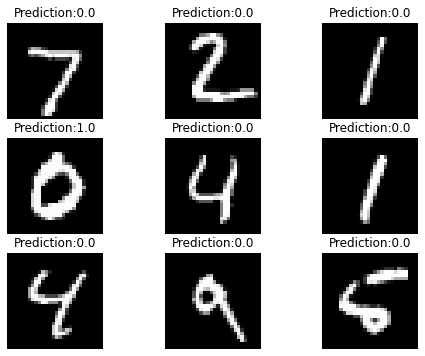

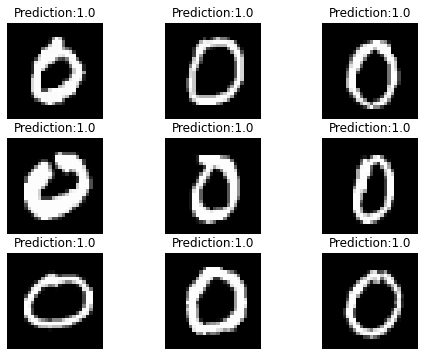

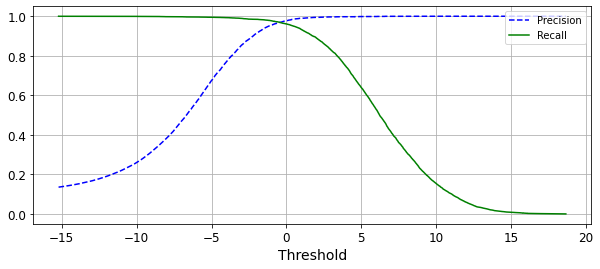

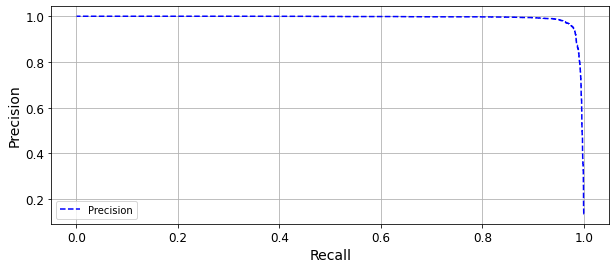

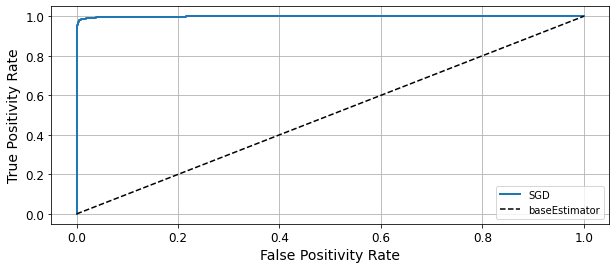

AUC: 0.998
importing Jupyter notebook from Week_6b_MNIST_Digits_Classification_using_Logistic_Regression.ipynb
LogReg: precision=0.9515151515151515, recall=0.9612244897959183
GridSearch: precision=0.9564336372847011, recall=0.963265306122449
LogRegCV: precision=0.9546370967741935, recall=0.9663265306122449


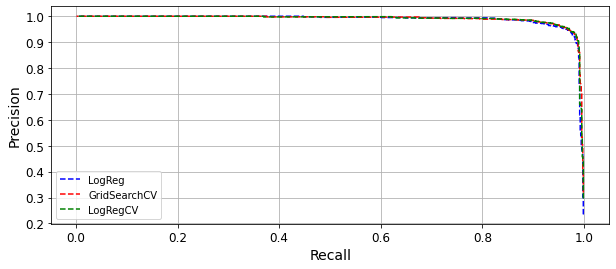

AUC-PR for logistic regression: 0.9871337497759658
AUC-PR for grid search: 0.9886520703587929
AUC-PR for logistic regression CV: 0.9871337497759658


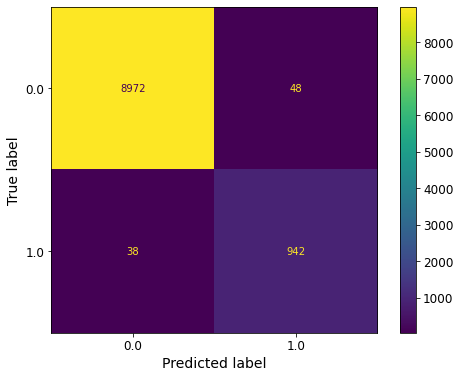

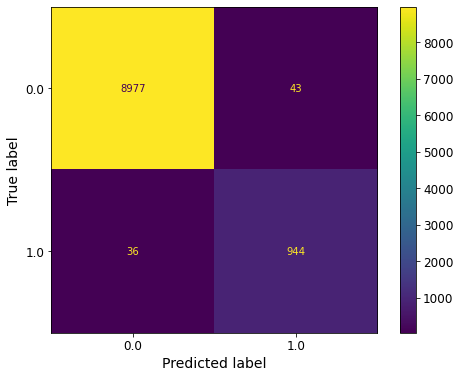

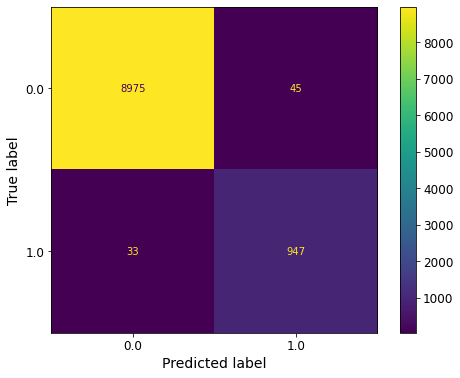

In [14]:
import import_ipynb
# from Week_6a_MNIST_Digits_Classification_using_SGDRegressor import bin_sgd_clf, bin_sgd_clf_l2
from Week_6b_MNIST_Digits_Classification_using_Logistic_Regression import pipe_logit

<Figure size 288x288 with 0 Axes>

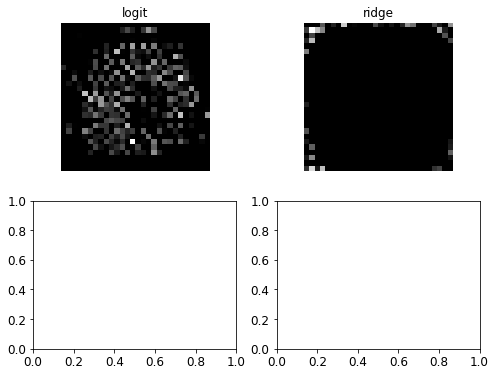

In [16]:
# models = (bin_sgd_clf, bin_sgd_clf_l2, pipe_logit, pipe_ridge)
models = (pipe_logit, pipe_ridge)

# titles = ('sgd', 'regularized sgd', 'logit', 'ridge')
titles = ('logit', 'ridge')
plt.figure(figsize=(4, 4))
plt.subplots(2, 2)
for i in range(0, 2):
    w = models[i][1].coef_
    w_matrix = w.reshape(28, 28)
    w_matrix[w_matrix < 0] = 0 # set the values less than zero to zero
    plt.subplot(2, 2, i+1)
    plt.imshow(w_matrix, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    plt.grid(False)
# fig.show()    